In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
insurance_data = pd.read_csv('medical_insurance.csv')

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


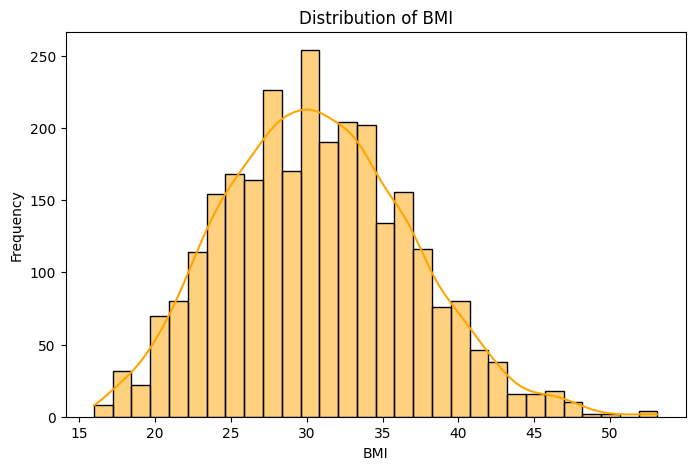

In [9]:
# Histogram of BMI
plt.figure(figsize=(8, 5))
sns.histplot(insurance_data['bmi'], bins=30, kde=True, color='orange')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

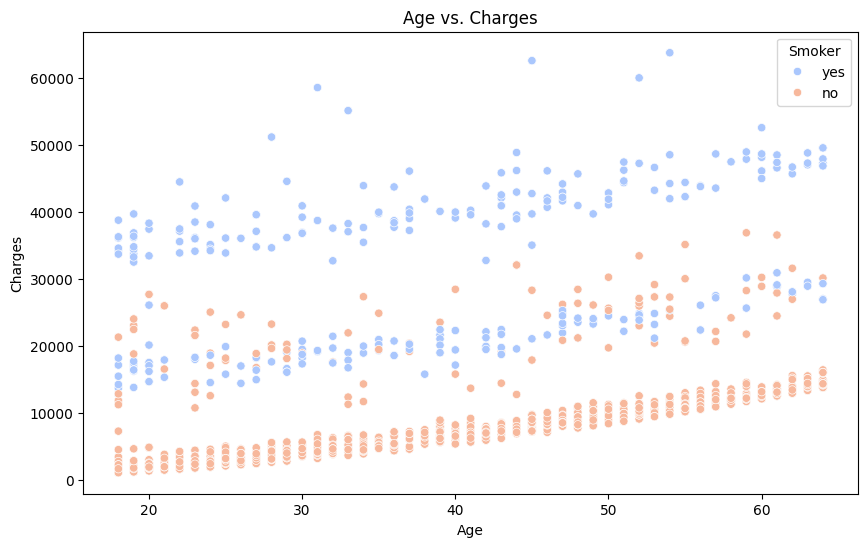

In [10]:
# Scatter plot of Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_data, hue='smoker', palette='coolwarm')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper right')
plt.show()

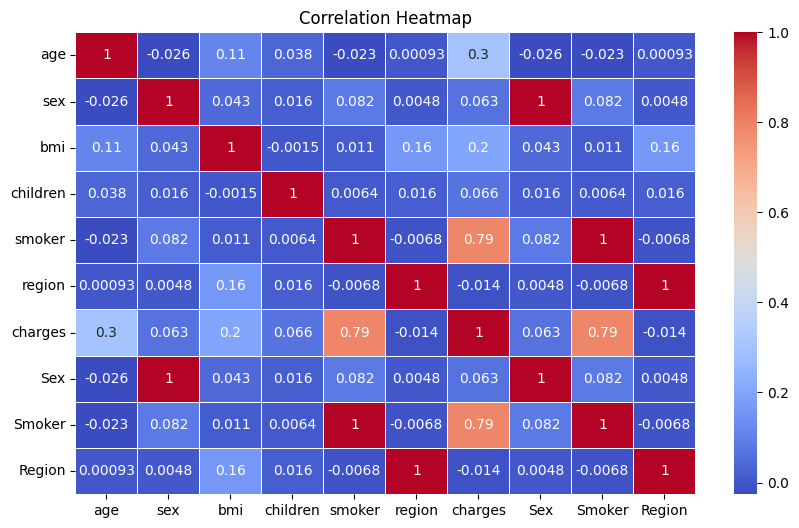

In [14]:
# Encoding categorical variables
label_encoder = LabelEncoder()
insurance_data['sex'] = label_encoder.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['region'] = label_encoder.fit_transform(insurance_data['region'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 39922479.35435013
R-squared: 0.7398864322395977


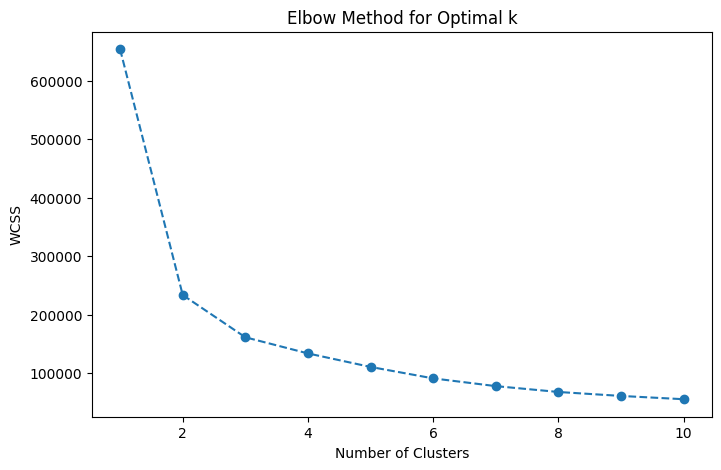

In [21]:
# Splitting the data into features and target variable
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on test set
y_pred = lr_model.predict(X_test)

# Evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# K-means clustering
# Selecting relevant features for clustering
X_cluster = insurance_data[['age', 'bmi', 'smoker']]

# Elbow method to determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


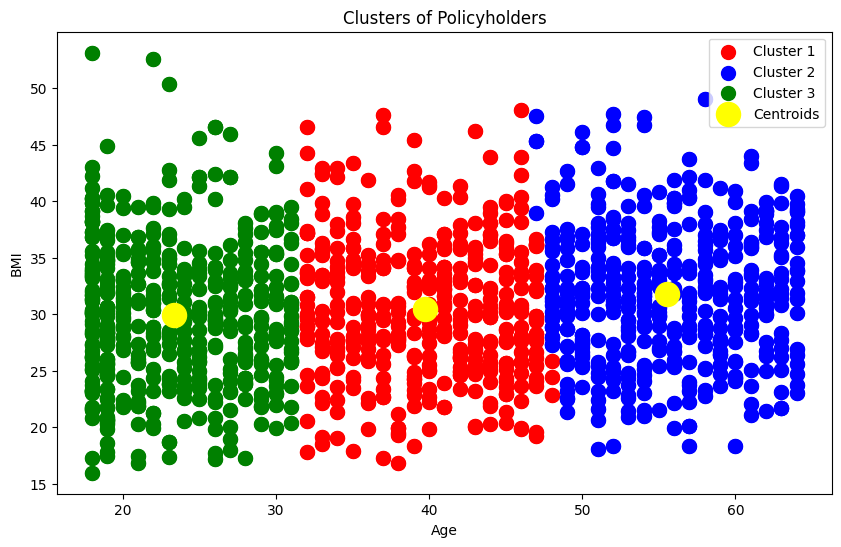

In [20]:
# Fitting K-means with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_cluster)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_cluster.iloc[y_kmeans == 0, 0], X_cluster.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_cluster.iloc[y_kmeans == 1, 0], X_cluster.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_cluster.iloc[y_kmeans == 2, 0], X_cluster.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Policyholders')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()